24/12/03 03:14:14 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


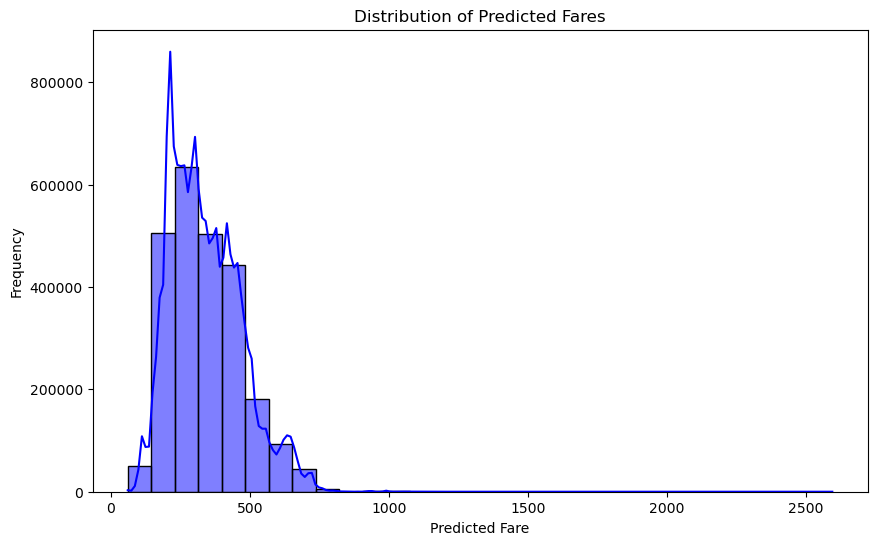

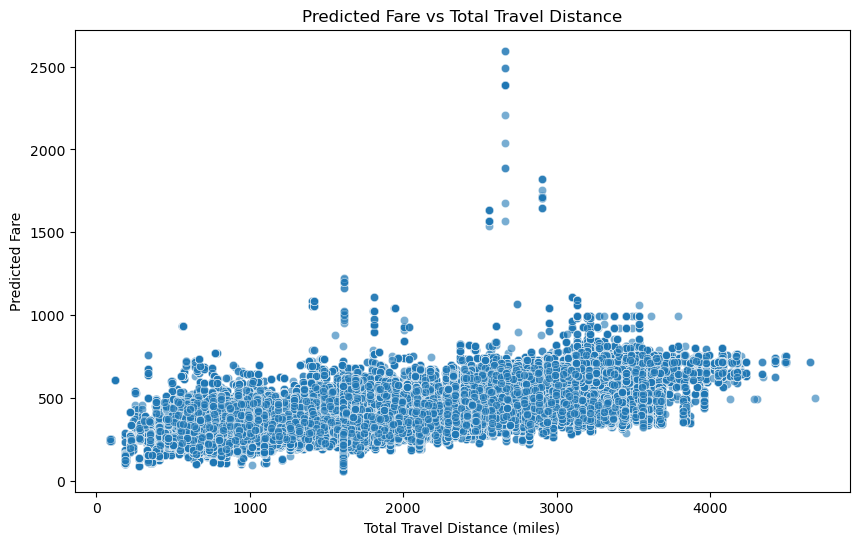

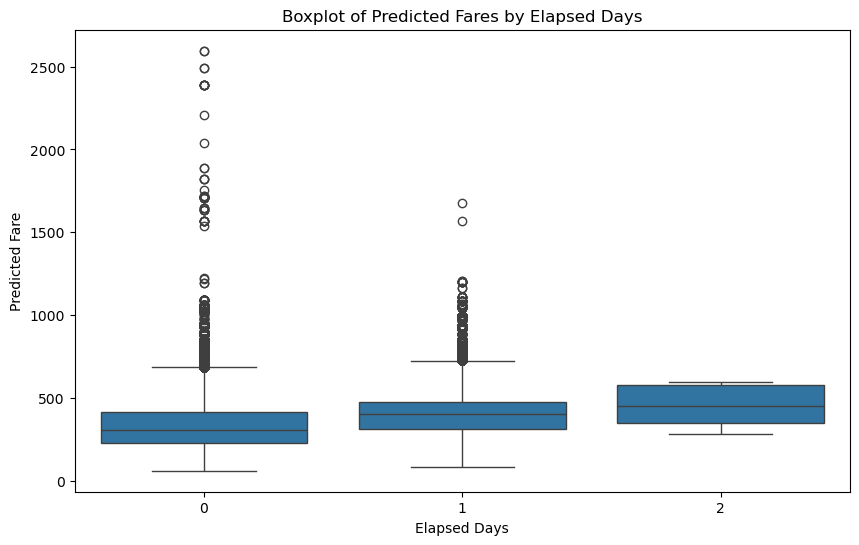

/tmp/ipykernel_62464/1243646363.py:48: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


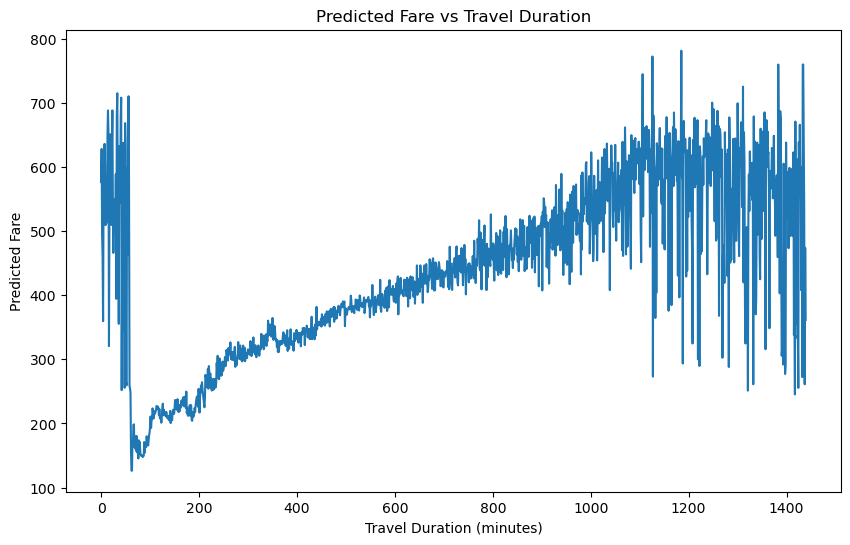

Summary Statistics:
         prediction  travelDurationMinutes  totalTravelDistance
count  2.464076e+06           2.464076e+06         2.464076e+06
mean   3.402770e+02           4.277826e+02         1.609853e+03
std    1.286497e+02           2.242557e+02         8.247524e+02
min    6.034078e+01           0.000000e+00         8.900000e+01
25%    2.387391e+02           2.620000e+02         9.280000e+02
50%    3.200425e+02           4.090000e+02         1.582000e+03
75%    4.245109e+02           5.660000e+02         2.339000e+03
max    2.595928e+03           1.439000e+03         4.681000e+03


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import SparkSession

# Initialize Spark session
spark = SparkSession.builder.appName("VisualizationPipeline").getOrCreate()

# Load predictions data
predictions_output_path = "gs://expedia-flight-prices/Models/predictions.parquet"
predictions_df = spark.read.parquet(predictions_output_path)

# Convert Spark DataFrame to Pandas for visualizations
predictions_pd = predictions_df.select(
    "prediction", "travelDurationMinutes", "elapsedDays", "totalTravelDistance"
).sample(fraction=0.1, seed=123).toPandas()

# Visualization 1: Distribution of Predicted Fares
plt.figure(figsize=(10, 6))
sns.histplot(predictions_pd["prediction"], kde=True, bins=30, color="blue")
plt.title("Distribution of Predicted Fares")
plt.xlabel("Predicted Fare")
plt.ylabel("Frequency")
plt.show()

# Visualization 2: Scatter Plot of Fare Prediction vs Travel Distance
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=predictions_pd["totalTravelDistance"], 
    y=predictions_pd["prediction"], 
    alpha=0.6
)
plt.title("Predicted Fare vs Total Travel Distance")
plt.xlabel("Total Travel Distance (miles)")
plt.ylabel("Predicted Fare")
plt.show()

# Visualization 3: Boxplot of Predicted Fares by Elapsed Days
plt.figure(figsize=(10, 6))
sns.boxplot(x=predictions_pd["elapsedDays"], y=predictions_pd["prediction"])
plt.title("Boxplot of Predicted Fares by Elapsed Days")
plt.xlabel("Elapsed Days")
plt.ylabel("Predicted Fare")
plt.show()

# Visualization 4: Relationship between Travel Duration and Predicted Fares
plt.figure(figsize=(10, 6))
sns.lineplot(
    x=predictions_pd["travelDurationMinutes"], 
    y=predictions_pd["prediction"], 
    ci=None
)
plt.title("Predicted Fare vs Travel Duration")
plt.xlabel("Travel Duration (minutes)")
plt.ylabel("Predicted Fare")
plt.show()

# Print summary statistics
print("Summary Statistics:")
print(predictions_pd[["prediction", "travelDurationMinutes", "totalTravelDistance"]].describe())
